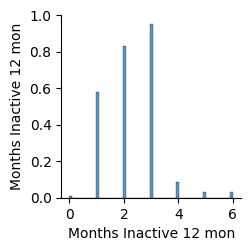

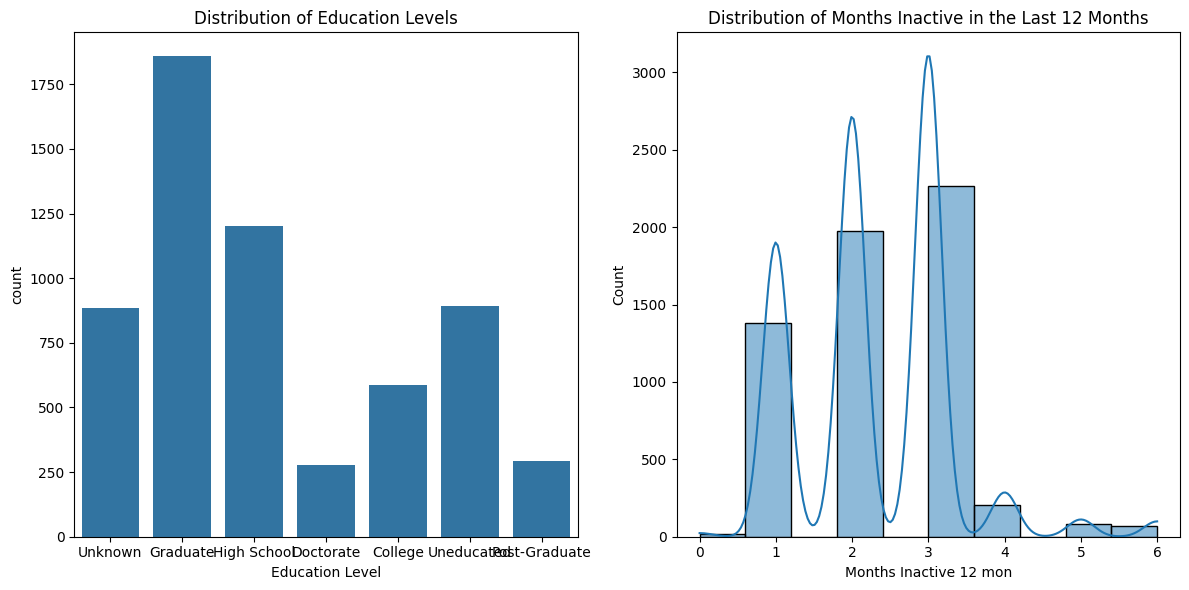

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a DataFrame (replace 'dataset.csv' with your actual dataset file)
data = pd.read_csv('/content/BankChurners for EDA 2024.csv')

# Select the two predictor variables: Education_Level and Months_Inactive_12_mon
selected_variables = ['Education Level', 'Months Inactive 12 mon']

# Create a pairplot to visualize the relationship between the selected variables
sns.pairplot(data[selected_variables])
plt.show()

# Create individual visualizations for each variable
plt.figure(figsize=(12, 6))

# Education_Level visualization
plt.subplot(1, 2, 1)
sns.countplot(x='Education Level', data=data)
plt.title('Distribution of Education Levels')

# Months_Inactive_12_mon visualization
plt.subplot(1, 2, 2)
sns.histplot(data['Months Inactive 12 mon'], bins=10, kde=True)
plt.title('Distribution of Months Inactive in the Last 12 Months')

plt.tight_layout()
plt.show()

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/BankChurners for EDA 2024.csv")

# Calculate the proportion of values for each education level category
education_level_counts = data['Education Level'].value_counts()
total_customers = len(data)
proportion_values = (education_level_counts / total_customers) * 100

print("Proportion of Values for Each Education Level Category:")
print(proportion_values)

Proportion of Values for Each Education Level Category:
Graduate         30.976992
High School      20.040013
Uneducated       14.904968
Unknown          14.754918
College           9.769923
Post-Graduate     4.901634
Doctorate         4.651551
Name: Education Level, dtype: float64


In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/BankChurners for EDA 2024.csv")

# Calculate the proportion of values for each Months Inactive 12 mon category
months_inactive_counts = data['Months Inactive 12 mon'].value_counts()
total_customers = len(data)
proportion_values = (months_inactive_counts / total_customers) * 100

print("Proportion of Values for Each Months Inactive 12 mon Category:")
print(proportion_values)

Proportion of Values for Each Months Inactive 12 mon Category:
3    37.745915
2    32.910970
1    23.041014
4     3.467823
5     1.350450
6     1.200400
0     0.283428
Name: Months Inactive 12 mon, dtype: float64


In [8]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/BankChurners for EDA 2024.csv")

# Define bins for different levels of inactivity
bins = [0, 3, 6, 9, 12]  # Define the bins as needed

# Create labels for the bins with descriptive month ranges
labels = ['0-3 months', '4-6 months', '7-9 months', '10-12 months']

# Categorize the data into different levels of inactivity based on the defined bins
data['Inactive Months Category'] = pd.cut(data['Months Inactive 12 mon'], bins=bins, labels=labels, include_lowest=True)

# Calculate the proportion of customers based on different levels of inactivity with descriptive month ranges
inactivity_counts = data['Inactive Months Category'].value_counts()
total_customers = len(data)
proportion_values = (inactivity_counts / total_customers) * 100

print("Proportion of Customers Based on Different Levels of Inactivity:")
for label, proportion in zip(labels, proportion_values):
    print(f"{label}: {proportion:.2f}%")

Proportion of Customers Based on Different Levels of Inactivity:
0-3 months: 93.98%
4-6 months: 6.02%
7-9 months: 0.00%
10-12 months: 0.00%


<ipython-input-28-6994211cfa7c>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


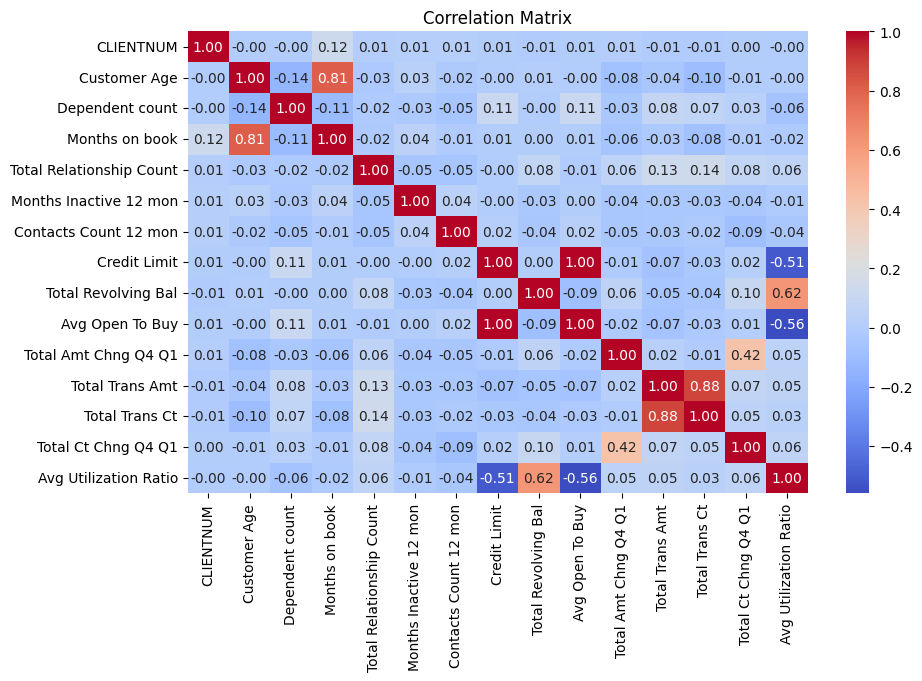

Correlation with 'Education Level' and specific variables:
                 Total Trans Amt  Total Trans Ct
Total Trans Amt          1.00000         0.88384
Total Trans Ct           0.88384         1.00000


<ipython-input-28-6994211cfa7c>:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  specific_correlation = data[['Education Level', 'Total Trans Amt', 'Total Trans Ct']].corr()


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/BankChurners for EDA 2024.csv")

# Calculate correlation between 'Education Level' and other variables
correlation_matrix = data.corr()

# Visualize correlation with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Explore correlation with specific variables
specific_correlation = data[['Education Level', 'Total Trans Amt', 'Total Trans Ct']].corr()
print("Correlation with 'Education Level' and specific variables:")
print(specific_correlation)

In [18]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Load the dataset
data = pd.read_csv("/content/BankChurners for EDA 2024.csv")

# Create a contingency table between 'Education Level' and another categorical variable
contingency_table = pd.crosstab(data['Education Level'], data['Marital Status'])

# Perform chi-square test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Test Results:
Chi-Square Statistic: 23.95118044686707
P-Value: 0.15663370617767863
Degrees of Freedom: 18
Expected Frequencies:
[[ 43.08536179 281.95998666 222.16805602  38.78659553]
 [ 20.51333778 134.24374792 105.77625875  18.46665555]
 [136.60853618 893.99599867 704.4168056  122.97865955]
 [ 88.37645882 578.35478493 455.7099033   79.55885295]
 [ 21.6162054  141.46115372 111.46315438  19.4594865 ]
 [ 65.7309103  430.1573858  338.93897966  59.17272424]
 [ 65.06918973 425.82694231 335.52684228  58.57702568]]


Chi-Square Test Results for Education Level vs Attrition Flag:
Chi-Square Statistic: 12.54656912239775
P-Value: 0.05082896727913653
Degrees of Freedom: 6
Expected Frequencies:
[[  76.7915972   509.2084028 ]
 [  36.56118706  242.43881294]
 [ 243.47915972 1614.52084028]
 [ 157.51450483 1044.48549517]
 [  38.52684228  255.47315772]
 [ 117.15305102  776.84694898]
 [ 115.97365789  769.02634211]]


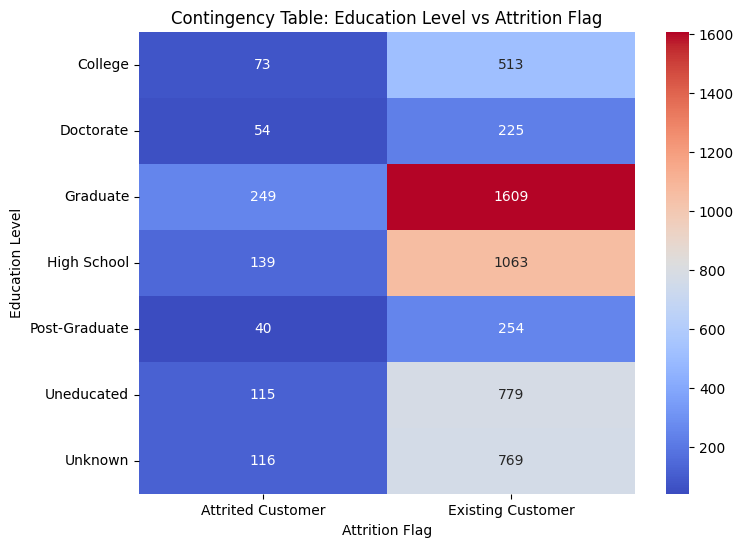

Chi-Square Test Results for Education Level vs Gender:
Chi-Square Statistic: 7.546066786046329
P-Value: 0.2732801054239399
Degrees of Freedom: 6
Expected Frequencies:
[[281.66688896 304.33311104]
 [134.1042014  144.8957986 ]
 [893.0666889  964.9333111 ]
 [577.75358453 624.24641547]
 [141.3141047  152.6858953 ]
 [429.71023675 464.28976325]
 [425.38429476 459.61570524]]


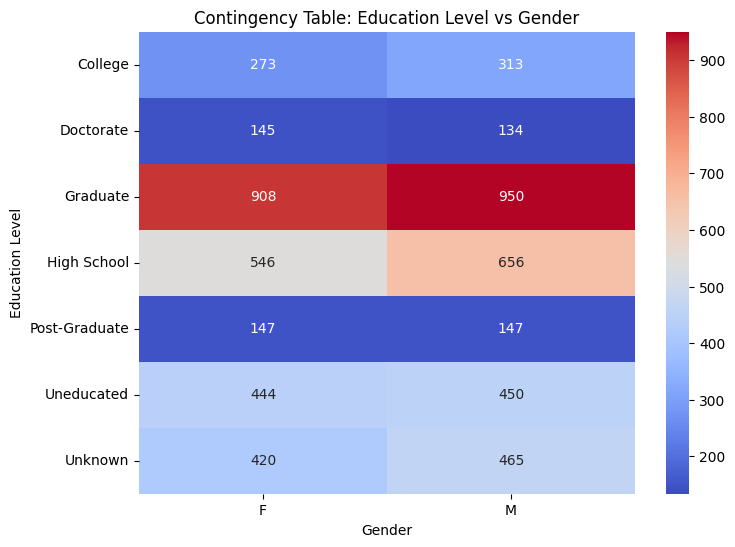

Chi-Square Test Results for Education Level vs Marital Status:
Chi-Square Statistic: 23.95118044686707
P-Value: 0.15663370617767863
Degrees of Freedom: 18
Expected Frequencies:
[[ 43.08536179 281.95998666 222.16805602  38.78659553]
 [ 20.51333778 134.24374792 105.77625875  18.46665555]
 [136.60853618 893.99599867 704.4168056  122.97865955]
 [ 88.37645882 578.35478493 455.7099033   79.55885295]
 [ 21.6162054  141.46115372 111.46315438  19.4594865 ]
 [ 65.7309103  430.1573858  338.93897966  59.17272424]
 [ 65.06918973 425.82694231 335.52684228  58.57702568]]


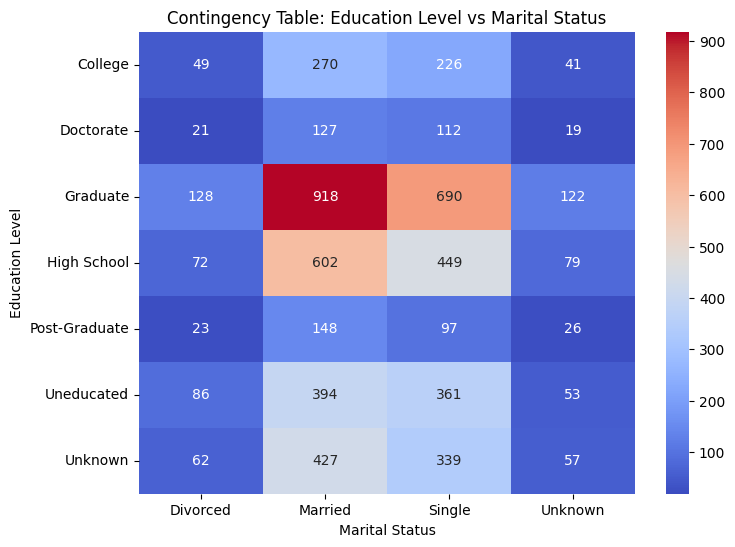

Chi-Square Test Results for Education Level vs Income Category:
Chi-Square Statistic: 35.61449892813039
P-Value: 0.22096929248998767
Degrees of Freedom: 30
Expected Frequencies:
[[ 45.52784261 100.63021007  90.0786929   97.01533845 191.78359453
   60.96432144]
 [ 21.67622541  47.91097032  42.88729577  46.18989663  91.30993665
   29.02567523]
 [144.35278426 319.06302101 285.60786929 307.60153384 608.07835945
  193.29643214]
 [ 93.38646215 206.41213738 184.76892297 198.99733244 393.38546182
  125.04968323]
 [ 22.84161387  50.48682894  45.19306435  48.67322441  96.21907302
   30.5861954 ]
 [ 69.45715238 153.52117372 137.42380794 148.00633545 292.58452818
   93.00700233]
 [ 68.75791931 151.97565855 136.04034678 146.51633878 289.63904635
   92.07069023]]


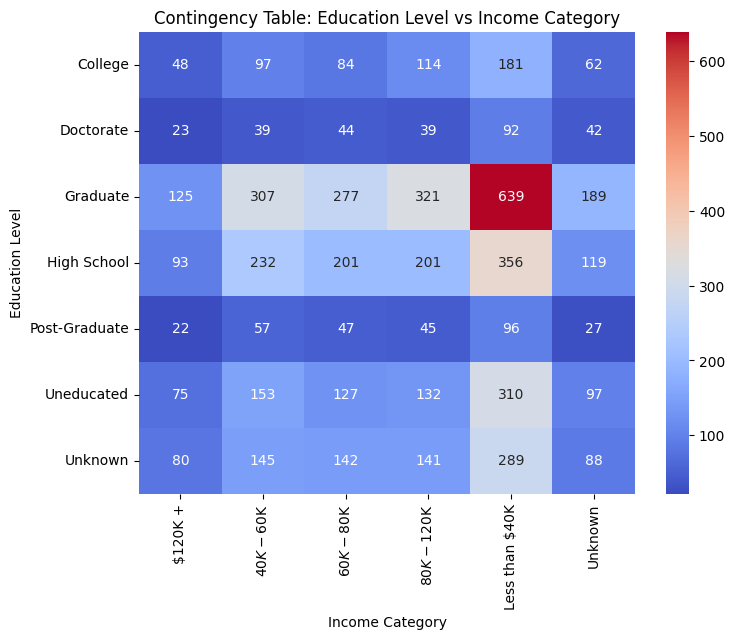

Chi-Square Test Results for Education Level vs Card Category:
Chi-Square Statistic: 20.71675162646683
P-Value: 0.2939433645438948
Degrees of Freedom: 18
Expected Frequencies:
[[5.56690230e+02 3.22407469e+00 2.93097699e-01 2.57925975e+01]
 [2.65045348e+02 1.53501167e+00 1.39546516e-01 1.22800934e+01]
 [1.76506902e+03 1.02224075e+01 9.29309770e-01 8.17792598e+01]
 [1.14187996e+03 6.61320440e+00 6.01200400e-01 5.29056352e+01]
 [2.79295098e+02 1.61753918e+00 1.47049016e-01 1.29403134e+01]
 [8.49285095e+02 4.91863955e+00 4.47149050e-01 3.93491164e+01]
 [8.40735245e+02 4.86912304e+00 4.42647549e-01 3.89529843e+01]]


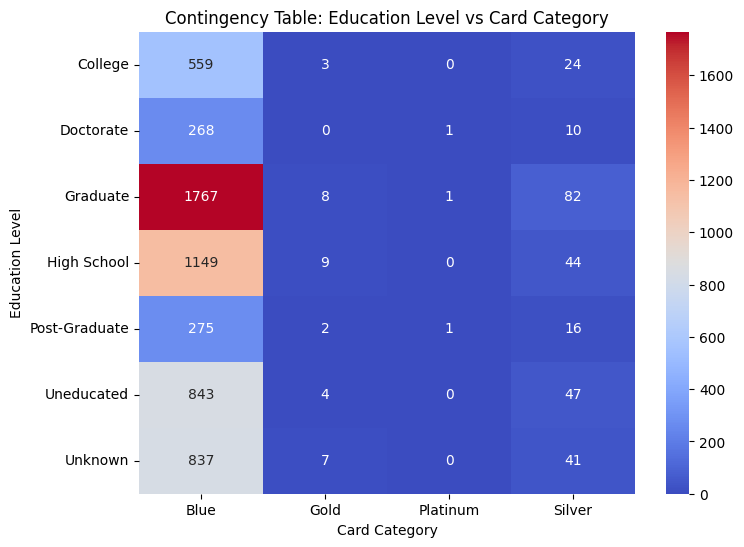

In [48]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/BankChurners for EDA 2024.csv")

# Create a contingency table between 'Education Level' and other categorical variables
categorical_variables = data.select_dtypes(include=['object']).columns.tolist()
categorical_variables.remove('Education Level')

for var in categorical_variables:
    contingency_table = pd.crosstab(data['Education Level'], data[var])

    # Perform chi-square test for independence
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print results of the chi-square test
    print(f"Chi-Square Test Results for Education Level vs {var}:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-Value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies:")
    print(expected)

    # Visualize the relationship using a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
    plt.title(f'Contingency Table: Education Level vs {var}')
    plt.show()

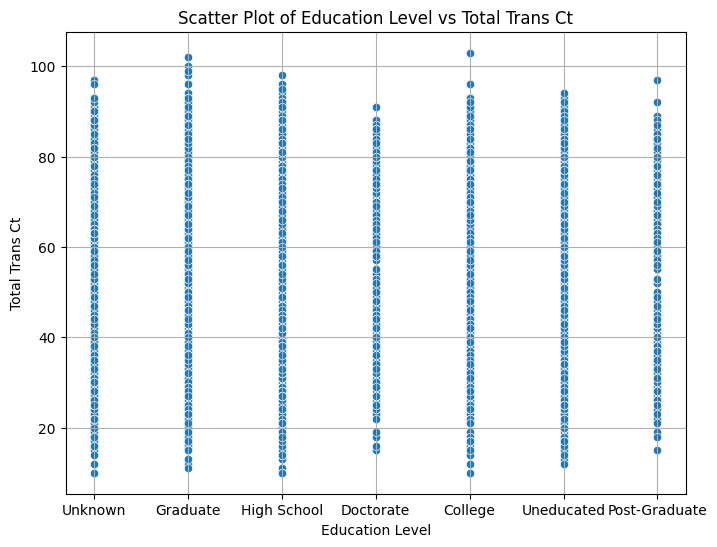

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/BankChurners for EDA 2024.csv")

# Select another variable of interest (replace 'Any other variable' with the desired variable name)
other_variable = 'Total Trans Ct'

# Create a scatter plot to visualize the relationship between 'Education Level' and the selected variable
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Education Level', y=other_variable, data=data)
plt.title(f"Scatter Plot of Education Level vs {other_variable}")
plt.xlabel('Education Level')
plt.ylabel(other_variable)
plt.grid(True)
plt.show()

Index(['CLIENTNUM', 'Attrition Flag', 'Customer Age', 'Gender',
       'Dependent count', 'Education Level', 'Marital Status',
       'Income Category', 'Card Category', 'Months on book',
       'Total Relationship Count', 'Months Inactive 12 mon',
       'Contacts Count 12 mon', 'Credit Limit', 'Total Revolving Bal',
       'Avg Open To Buy', 'Total Amt Chng Q4 Q1', 'Total Trans Amt',
       'Total Trans Ct', 'Total Ct Chng Q4 Q1', 'Avg Utilization Ratio'],
      dtype='object')


<ipython-input-26-e5c8aa4d2168>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr(method='pearson')  # Pearson correlation coefficient for numeric variables


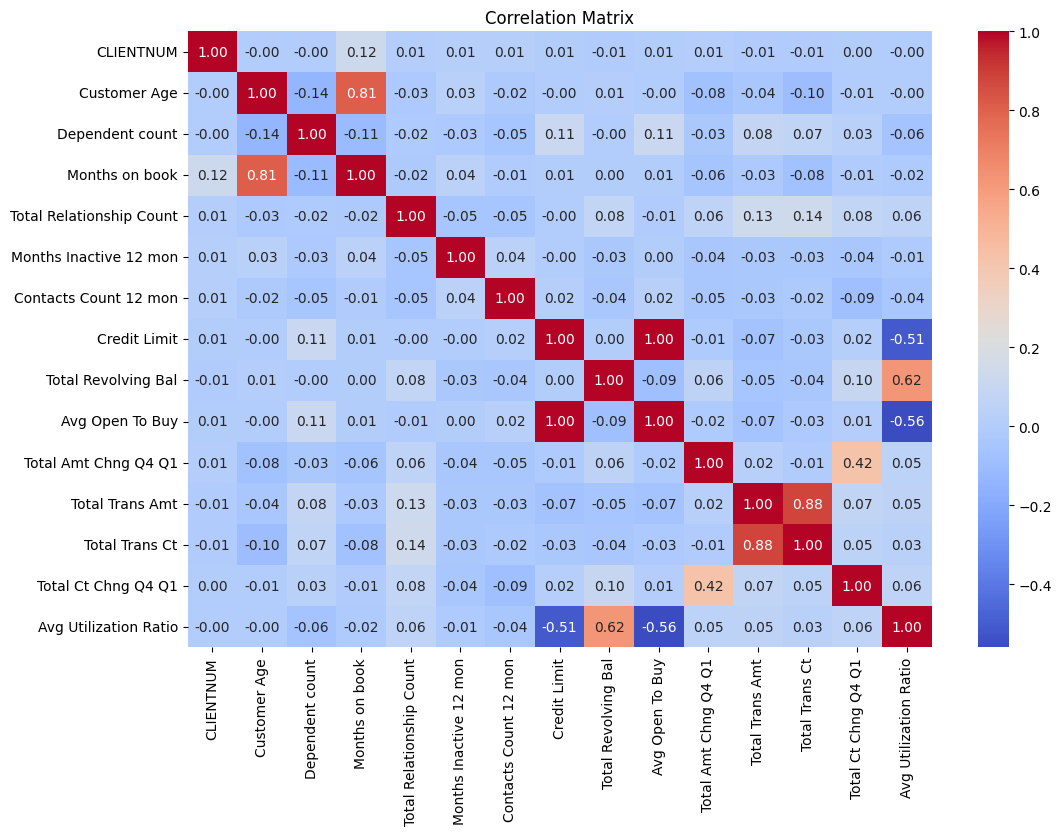

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/BankChurners for EDA 2024.csv")

# Check the column names in the dataset
print(data.columns)



# Calculate correlation between 'Months Inactive 12 Mon' and other variables
correlation_matrix = data.corr(method='pearson')  # Pearson correlation coefficient for numeric variables

# Visualize correlation with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



Correlation coefficients with Months Inactive 12 Mon:
CLIENTNUM: 0.013776
Customer Age: 0.028001
Dependent count: -0.027341
Months on book: 0.037309
Total Relationship Count: -0.051273
Contacts Count 12 mon: 0.037557
Credit Limit: -0.001564
Total Revolving Bal: -0.032471
Avg Open To Buy: 0.00139
Total Amt Chng Q4 Q1: -0.037781
Total Trans Amt: -0.032186
Total Trans Ct: -0.030847
Total Ct Chng Q4 Q1: -0.038753
Avg Utilization Ratio: -0.013123


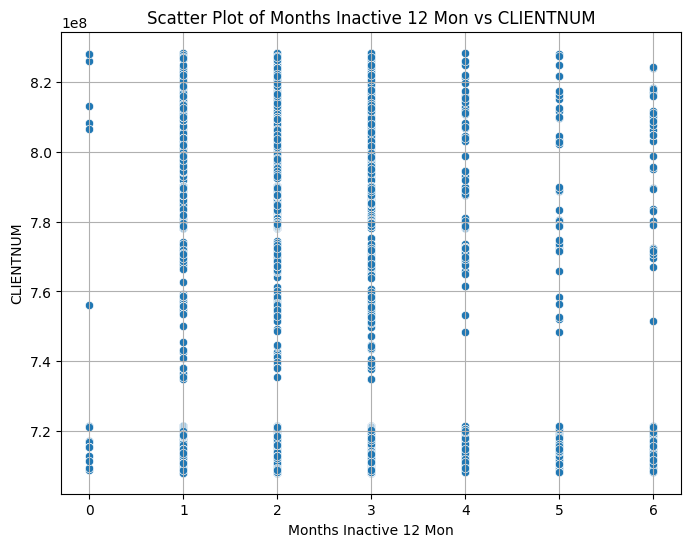

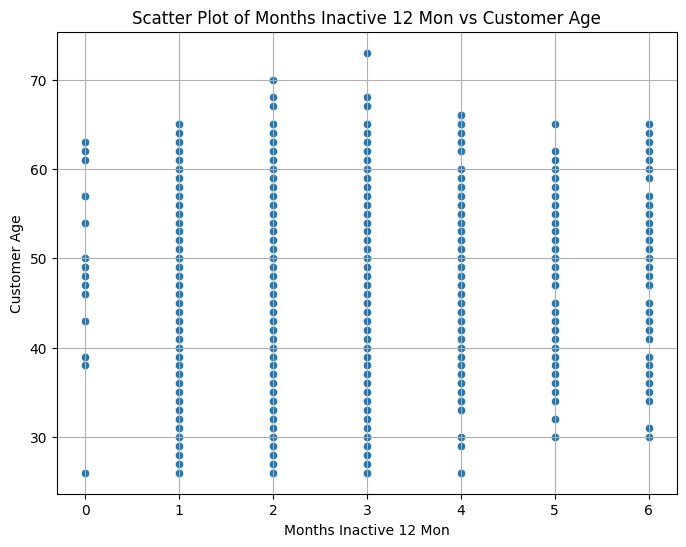

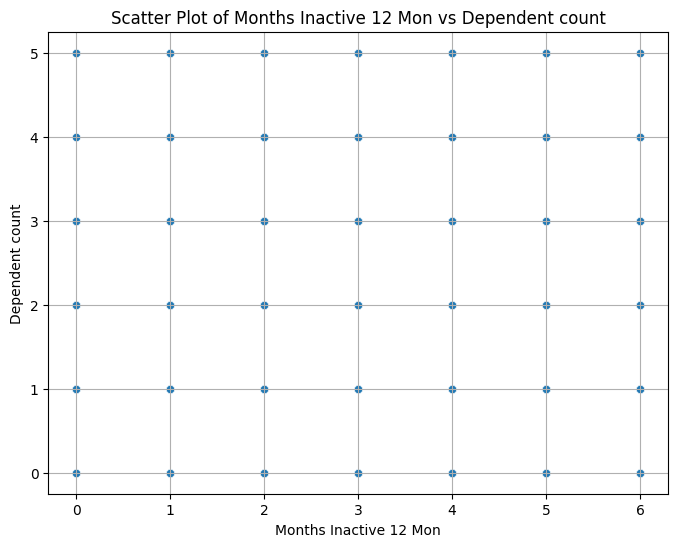

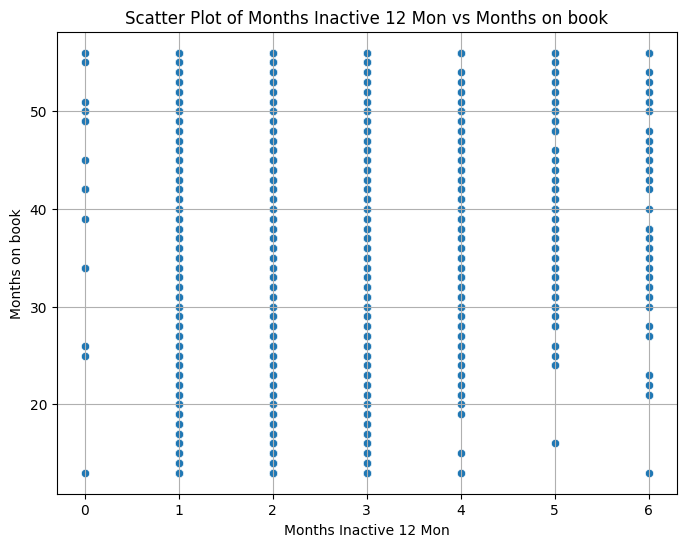

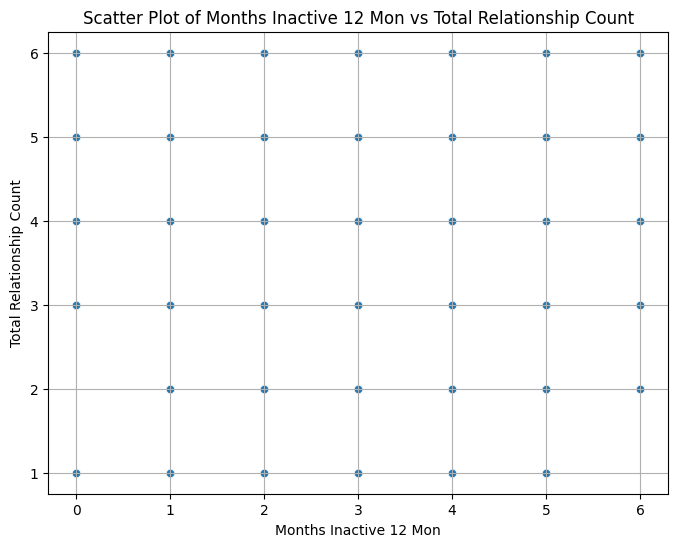

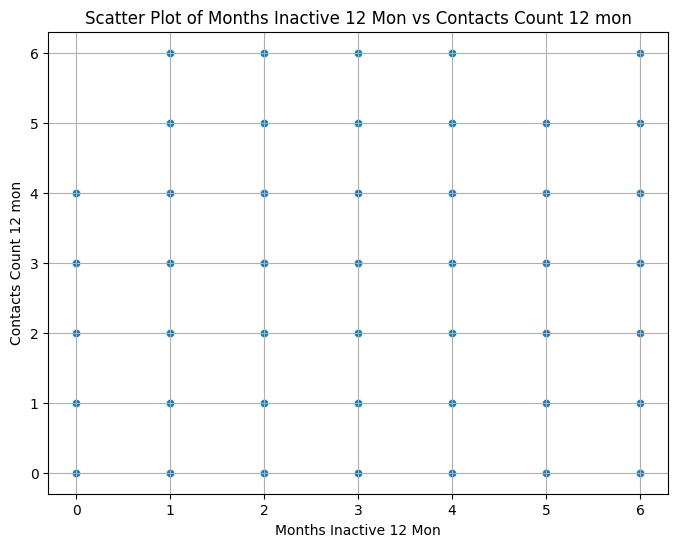

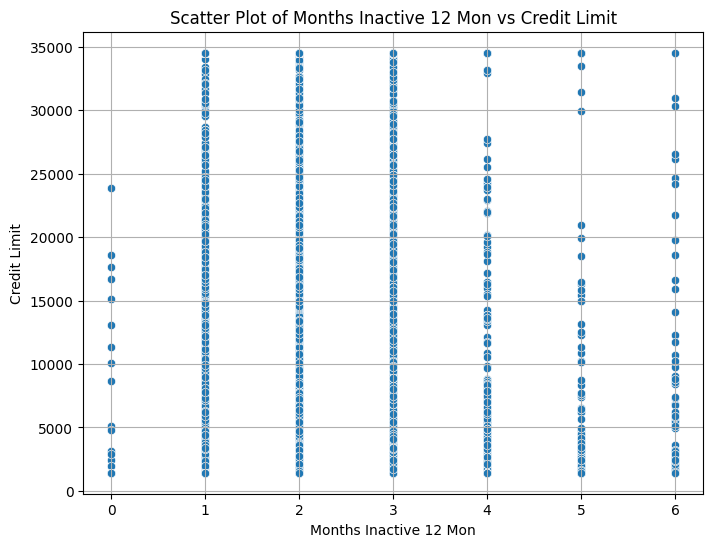

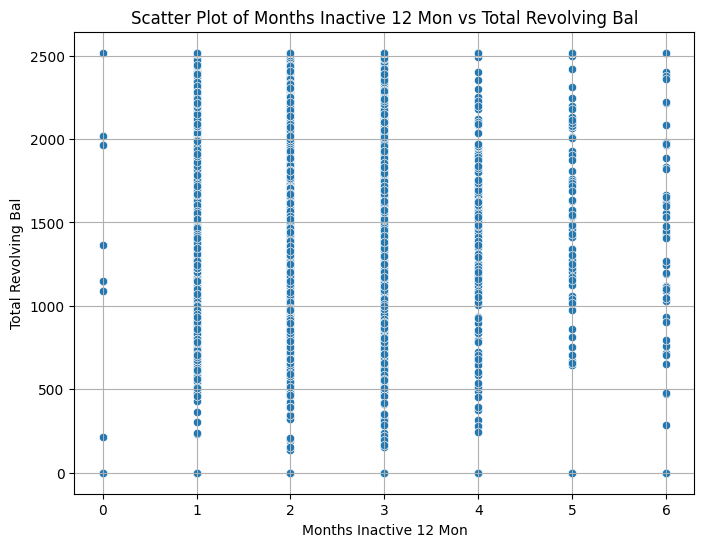

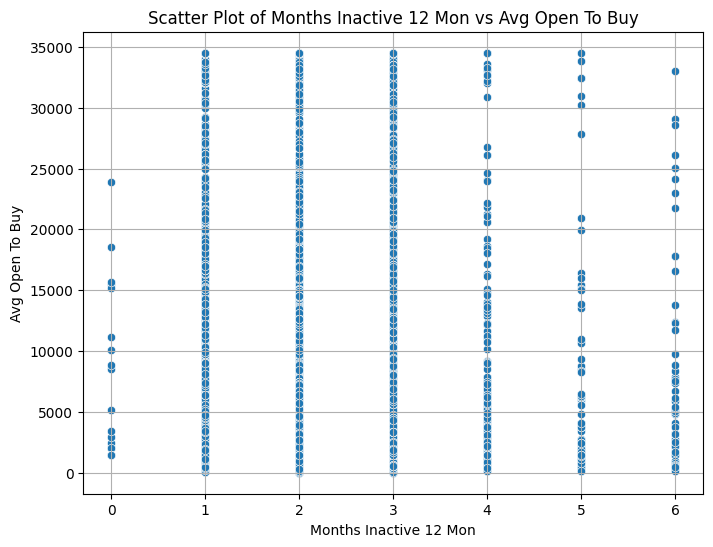

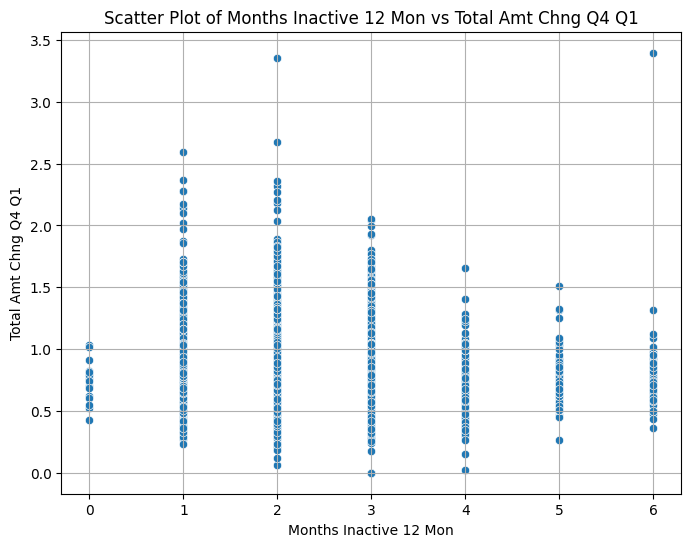

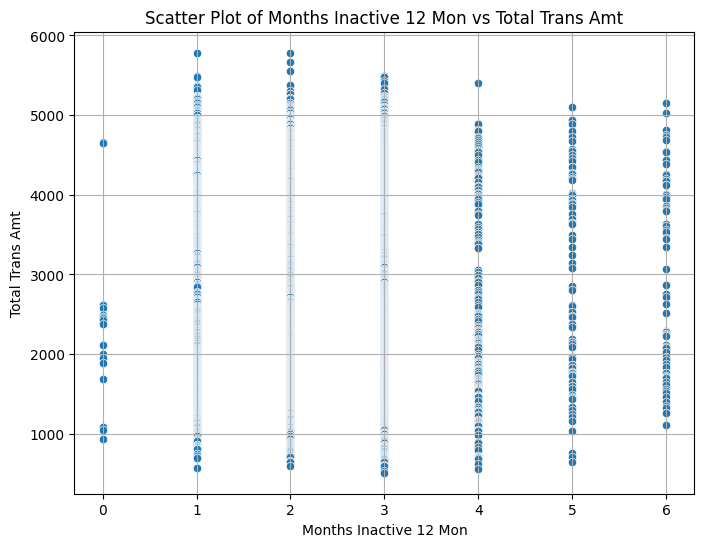

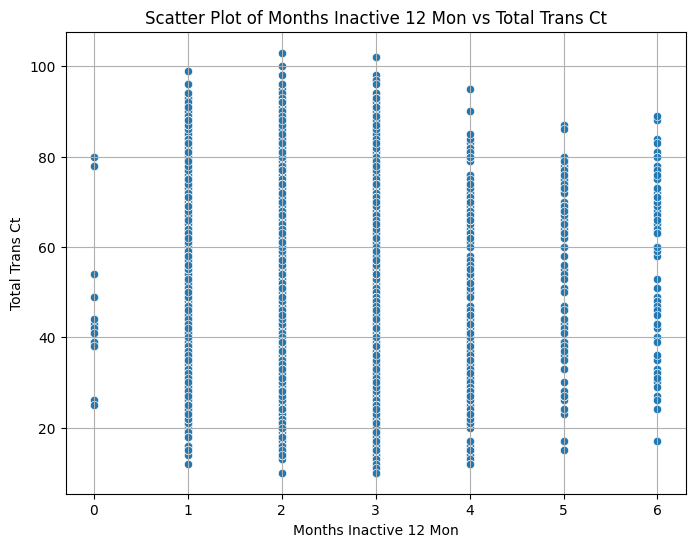

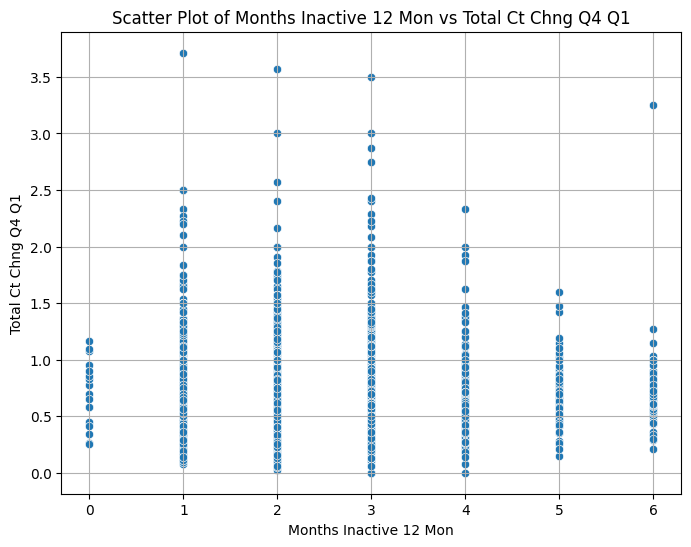

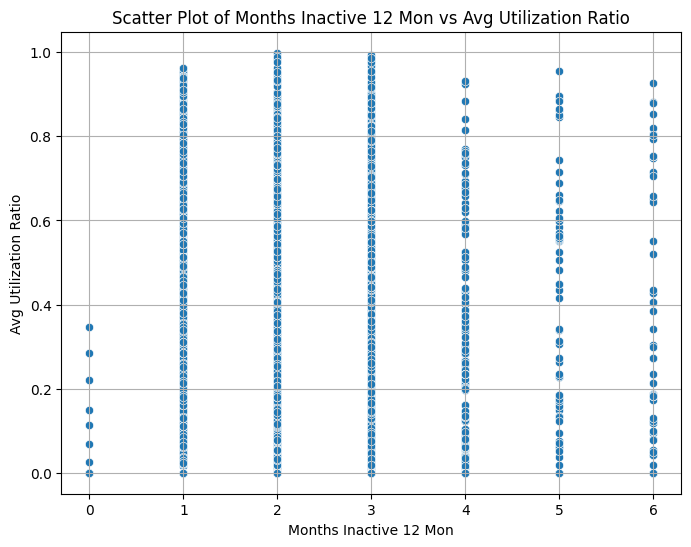

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/BankChurners for EDA 2024.csv")

# Select numeric variables for correlation analysis (excluding 'Months_Inactive_12_mon')
numeric_variables = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_variables.remove('Months Inactive 12 mon')

# Calculate correlation coefficients with 'Months_Inactive_12_mon' for each numeric variable
correlation_results = {}
for var in numeric_variables:
    correlation = data['Months Inactive 12 mon'].corr(data[var])
    correlation_results[var] = round(correlation, 6)  # Limiting to 6 decimal places

# Print correlation coefficients
print("Correlation coefficients with Months Inactive 12 Mon:")
for var, corr in correlation_results.items():
    print(f"{var}: {corr}")

# Visualize relationships using scatter plots
for var in numeric_variables:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Months Inactive 12 mon', y=var, data=data)
    plt.title(f"Scatter Plot of Months Inactive 12 Mon vs {var}")
    plt.xlabel('Months Inactive 12 Mon')
    plt.ylabel(var)
    plt.grid(True)
    plt.show()

<ipython-input-30-a1785bb19646>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


Correlation coefficients with Months Inactive 12 Mon:
CLIENTNUM                   0.013776
Customer Age                0.028001
Dependent count            -0.027341
Months on book              0.037309
Total Relationship Count   -0.051273
Months Inactive 12 mon      1.000000
Contacts Count 12 mon       0.037557
Credit Limit               -0.001564
Total Revolving Bal        -0.032471
Avg Open To Buy             0.001390
Total Amt Chng Q4 Q1       -0.037781
Total Trans Amt            -0.032186
Total Trans Ct             -0.030847
Total Ct Chng Q4 Q1        -0.038753
Avg Utilization Ratio      -0.013123
Name: Months Inactive 12 mon, dtype: float64


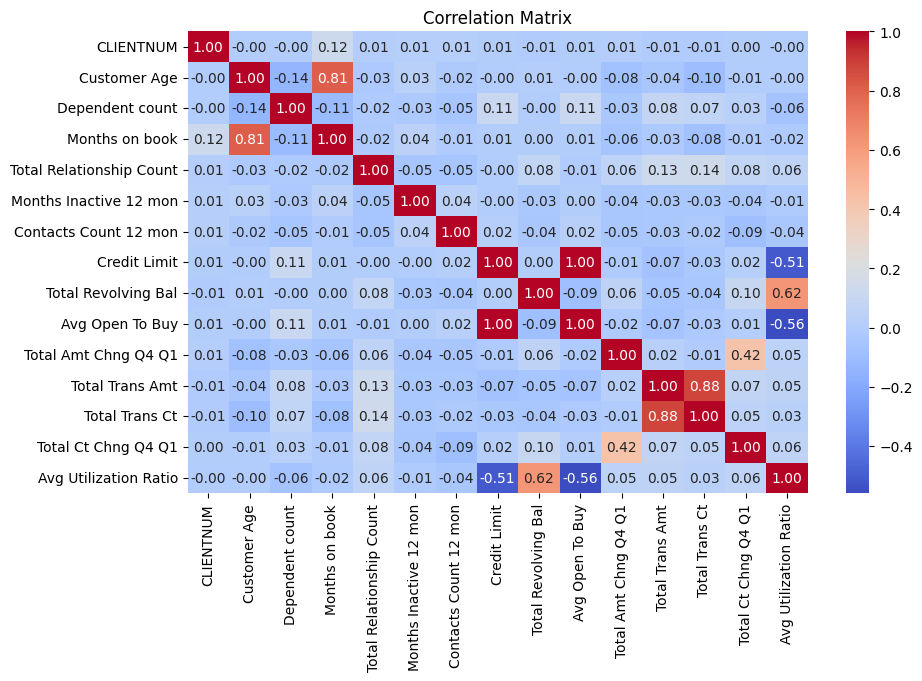

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/BankChurners for EDA 2024.csv")

# Calculate correlation coefficients between 'Months Inactive 12 Mon' and other numeric variables
correlation_matrix = data.corr()
months_inactive_correlation = correlation_matrix['Months Inactive 12 mon']

# Print correlation coefficients
print("Correlation coefficients with Months Inactive 12 Mon:")
print(months_inactive_correlation)

# Visualize relationships using a correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

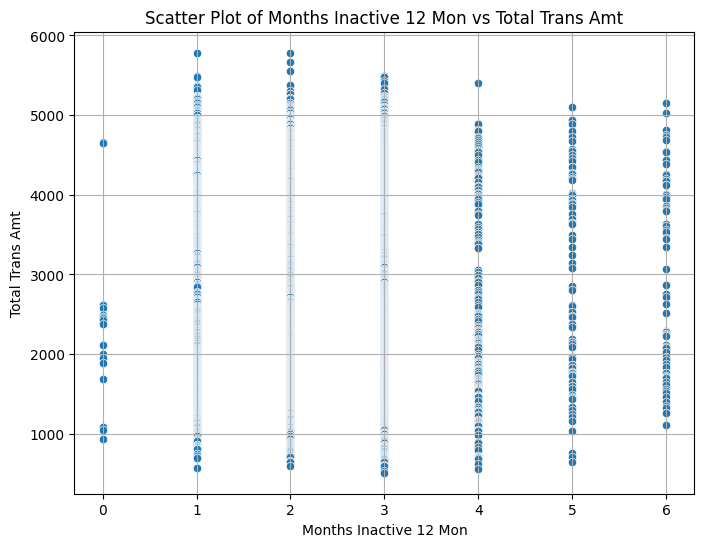

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/BankChurners for EDA 2024.csv")

# Select another numeric variable of interest (replace 'Other Numeric Variable' with the desired variable name)
other_numeric_variable = 'Total Trans Amt'

# Create a scatter plot to visualize the relationship between 'Months Inactive 12 Mon' and the selected numeric variable
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Months Inactive 12 mon', y=other_numeric_variable, data=data)
plt.title(f"Scatter Plot of Months Inactive 12 Mon vs {other_numeric_variable}")
plt.xlabel('Months Inactive 12 Mon')
plt.ylabel(other_numeric_variable)
plt.grid(True)
plt.show()

In [32]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/BankChurners for EDA 2024.csv")

# Calculate the proportion of attrited and existing customers by education level
attrition_by_education = data.groupby(['Education Level', 'Attrition Flag'])['Attrition Flag'].count().unstack()

# Calculate the total count of customers by education level
total_customers_by_education = data['Education Level'].value_counts()

# Calculate the proportion of attrited customers by education level
proportion_attrited_by_education = (attrition_by_education['Attrited Customer'] / total_customers_by_education) * 100

# Calculate the proportion of existing customers by education level
proportion_existing_by_education = (attrition_by_education['Existing Customer'] / total_customers_by_education) * 100

# Display the proportions of attrited and existing customers by education level
proportion_df = pd.DataFrame({'Attrited Customer (%)': proportion_attrited_by_education,
                              'Existing Customer (%)': proportion_existing_by_education})
print("Proportion of Attrited and Existing Customers by Education Level:")
print(proportion_df)

Proportion of Attrited and Existing Customers by Education Level:
               Attrited Customer (%)  Existing Customer (%)
College                    12.457338              87.542662
Doctorate                  19.354839              80.645161
Graduate                   13.401507              86.598493
High School                11.564060              88.435940
Post-Graduate              13.605442              86.394558
Uneducated                 12.863535              87.136465
Unknown                    13.107345              86.892655


In [34]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/BankChurners for EDA 2024.csv")

# Define the threshold for low and high inactive months
low_inactive_threshold = 6  # Define threshold for low inactive months
high_inactive_threshold = 12  # Define threshold for high inactive months

# Categorize customers based on inactive months
data['Inactive Months Category'] = pd.cut(data['Months Inactive 12 mon'], bins=[0, low_inactive_threshold, high_inactive_threshold, float('inf')],
                                         labels=['Low Inactive', 'Moderate Inactive', 'High Inactive'])

# Calculate the proportion of attrited and existing customers by inactive months category
attrition_by_inactive = data.groupby(['Inactive Months Category', 'Attrition Flag'])['Attrition Flag'].count().unstack()

# Calculate the total count of customers by inactive months category
total_customers_by_inactive = data['Inactive Months Category'].value_counts()

# Calculate the proportion of attrited customers by inactive months category
proportion_attrited_by_inactive = (attrition_by_inactive['Attrited Customer'] / total_customers_by_inactive) * 100

# Calculate the proportion of existing customers by inactive months category
proportion_existing_by_inactive = (attrition_by_inactive['Existing Customer'] / total_customers_by_inactive) * 100

# Display the proportions of attrited and existing customers by inactive months category
proportion_df = pd.DataFrame({'Attrited Customer (%)': proportion_attrited_by_inactive,
                              'Existing Customer (%)': proportion_existing_by_inactive})
print("Proportion of Attrited and Existing Customers by Inactive Months Category:")
print(proportion_df)

Proportion of Attrited and Existing Customers by Inactive Months Category:
                          Attrited Customer (%)  Existing Customer (%)
Inactive Months Category                                              
Low Inactive                          12.957699              87.042301
Moderate Inactive                           NaN                    NaN
High Inactive                               NaN                    NaN


In [38]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/BankChurners for EDA 2024.csv")

# Categorize customers based on the number of inactive months
data['Inactive Months Category'] = pd.cut(data['Months Inactive 12 mon'], bins=3, labels=['Low Inactive', 'Moderate Inactive', 'High Inactive'])

# Calculate the proportion of attrited and existing customers by inactive months category
attrition_by_inactive = data.groupby(['Inactive Months Category', 'Attrition Flag'])['Attrition Flag'].count().unstack()

# Calculate the total count of customers by inactive months category
total_customers_by_inactive = data['Inactive Months Category'].value_counts()

# Calculate the proportion of attrited customers by inactive months category
proportion_attrited_by_inactive = (attrition_by_inactive['Attrited Customer'] / total_customers_by_inactive) * 100

# Calculate the proportion of existing customers by inactive months category
proportion_existing_by_inactive = (attrition_by_inactive['Existing Customer'] / total_customers_by_inactive) * 100

# Display the proportions of attrited and existing customers by inactive months category
proportion_df = pd.DataFrame({'Attrited Customer (%)': proportion_attrited_by_inactive,
                              'Existing Customer (%)': proportion_existing_by_inactive})
print("Proportion of Attrited and Existing Customers by Inactive Months Category:")
print(proportion_df)

Proportion of Attrited and Existing Customers by Inactive Months Category:
                          Attrited Customer (%)  Existing Customer (%)
Inactive Months Category                                              
Low Inactive                           9.783575              90.216425
Moderate Inactive                     17.394822              82.605178
High Inactive                         16.993464              83.006536


In [39]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
data = pd.read_csv("/content/BankChurners for EDA 2024.csv")

# Create a contingency table between 'Education Level' and 'Attrition Flag'
contingency_table = pd.crosstab(data['Education Level'], data['Attrition Flag'])

# Perform chi-square test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set significance level (alpha)
alpha = 0.05

# Print the results of the hypothesis test
print("Hypothesis Testing Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpret the results based on the p-value
if p < alpha:
    print("The null hypothesis is rejected. Education Level significantly predicts customer churn.")
else:
    print("The null hypothesis is not rejected. There is no significant association between Education Level and customer churn.")

Hypothesis Testing Results:
Chi-Square Statistic: 12.54656912239775
P-Value: 0.05082896727913653
Degrees of Freedom: 6
Expected Frequencies:
[[  76.7915972   509.2084028 ]
 [  36.56118706  242.43881294]
 [ 243.47915972 1614.52084028]
 [ 157.51450483 1044.48549517]
 [  38.52684228  255.47315772]
 [ 117.15305102  776.84694898]
 [ 115.97365789  769.02634211]]
The null hypothesis is not rejected. There is no significant association between Education Level and customer churn.


In [41]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset
data = pd.read_csv("/content/BankChurners for EDA 2024.csv")

# Separate data for active and attrited customers
inactive_customers = data[data['Attrition Flag'] == 'Attrited Customer']['Months Inactive 12 mon']
active_customers = data[data['Attrition Flag'] == 'Existing Customer']['Months Inactive 12 mon']

# Perform independent t-test to compare inactivity duration between active and attrited customers
t_statistic, p_value = ttest_ind(inactive_customers, active_customers)

# Set significance level (alpha)
alpha = 0.05

# Print the results of the hypothesis test
print("Hypothesis Testing Results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Interpret the results based on the p-value
if p_value < alpha:
    print("The null hypothesis is rejected. 'Months Inactive 12 Mon' is a significant predictor of customer churn.")
else:
    print("The null hypothesis is not rejected. There is no significant relationship between inactivity duration and customer churn.")

Hypothesis Testing Results:
T-Statistic: 10.550550212121802
P-Value: 8.489915144611333e-26
The null hypothesis is rejected. 'Months Inactive 12 Mon' is a significant predictor of customer churn.
